In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution1D,MaxPooling1D,BatchNormalization,Flatten,Dense, Dropout, Activation,LSTM
from keras import optimizers

import os
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:

def lstm(epochs): #reshape필요
    global X,Y,hist
    
    
    X = np.array(X)
    Y = np.array(Y)
    X_=np.reshape(X,[-1,xshape,1])

    X_train, X_test, Y_train, Y_test = train_test_split(X_,Y)

    print(X_.shape)
    
    model = Sequential()
    model.add(LSTM(32, input_shape=(xshape,1)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='softmax'))
    #model.summary()

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist=model.fit(X_train, Y_train, nb_epoch=epochs,batch_size=20, verbose=2, validation_split=0.1)
    
    test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2) #실제 test_data 테스트 결과
    print("LSTM",test_loss, test_acc)
    doplot()

    
def doplot(): #plot함수
    global hist
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend([ 'acc', 'val_acc'], loc='upper left')
    plt.show()
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

In [7]:

def DA_Jitter(X, sigma=0.075):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

'''
def DA_Scaling(X, sigma=0.1):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X*myNoise

def GenerateRandomCurves(X, sigma=0.2, knot=4):
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_a = CubicSpline(xx[:,0], yy[:,0])
    cs_b = CubicSpline(xx[:,1], yy[:,1])
    cs_c = CubicSpline(xx[:,2], yy[:,2])
    cs_d = CubicSpline(xx[:,3], yy[:,3])
    return np.array([cs_a(x_range),cs_b(x_range),cs_c(x_range),cs_d(x_range)]).transpose()

def DA_MagWarp(X, sigma=0.2):
    return X * GenerateRandomCurves(X, sigma)

def DA_Rotation(X):
    axis = np.random.uniform(low=-1, high=1, size=X.shape[1])
    angle = np.random.uniform(low=-np.pi, high=np.pi)
    return np.matmul(X , axangle2mat(axis,angle))
'''

'\ndef DA_Scaling(X, sigma=0.1):\n    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)\n    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)\n    return X*myNoise\n\ndef GenerateRandomCurves(X, sigma=0.2, knot=4):\n    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()\n    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))\n    x_range = np.arange(X.shape[0])\n    cs_a = CubicSpline(xx[:,0], yy[:,0])\n    cs_b = CubicSpline(xx[:,1], yy[:,1])\n    cs_c = CubicSpline(xx[:,2], yy[:,2])\n    cs_d = CubicSpline(xx[:,3], yy[:,3])\n    return np.array([cs_a(x_range),cs_b(x_range),cs_c(x_range),cs_d(x_range)]).transpose()\n\ndef DA_MagWarp(X, sigma=0.2):\n    return X * GenerateRandomCurves(X, sigma)\n\ndef DA_Rotation(X):\n    axis = np.random.uniform(low=-1, high=1, size=X.shape[1])\n    angle = np.random.uniform(low=-np.pi, high=np.pi)\n    return np.matmul(X , axangle2mat(axi

sub8_data.npy
sub8_label.npy
aug전  (1202, 28) (1202,)
aug후  (2404, 28) (2404,)
(1803, 28) (601, 28)
(2404, 28, 1)


C:\Users\jaewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1622 samples, validate on 181 samples
Epoch 1/50
 - 2s - loss: 0.6468 - accuracy: 0.6695 - val_loss: 0.5861 - val_accuracy: 0.7072
Epoch 2/50
 - 1s - loss: 0.5864 - accuracy: 0.6819 - val_loss: 0.5626 - val_accuracy: 0.7072
Epoch 3/50
 - 1s - loss: 0.5717 - accuracy: 0.6991 - val_loss: 0.5709 - val_accuracy: 0.6796
Epoch 4/50
 - 1s - loss: 0.5583 - accuracy: 0.7028 - val_loss: 0.5625 - val_accuracy: 0.7072
Epoch 5/50
 - 1s - loss: 0.5164 - accuracy: 0.7343 - val_loss: 0.5127 - val_accuracy: 0.7348
Epoch 6/50
 - 1s - loss: 0.4921 - accuracy: 0.7417 - val_loss: 0.5162 - val_accuracy: 0.7238
Epoch 7/50
 - 1s - loss: 0.4876 - accuracy: 0.7472 - val_loss: 0.5022 - val_accuracy: 0.7459
Epoch 8/50
 - 1s - loss: 0.4751 - accuracy: 0.7552 - val_loss: 0.5006 - val_accuracy: 0.7348
Epoch 9/50
 - 1s - loss: 0.4745 - accuracy: 0.7522 - val_loss: 0.4881 - val_accuracy: 0.7403
Epoch 10/50
 - 1s - loss: 0.4599 - accuracy: 0.7682 - val_loss: 0.4956 - val_accuracy: 0.7459
Epoch 11/50
 - 1s - lo

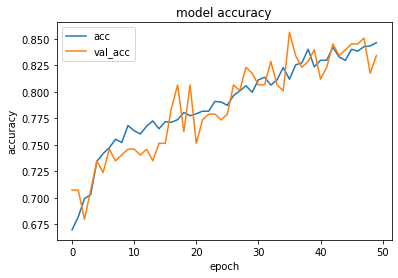

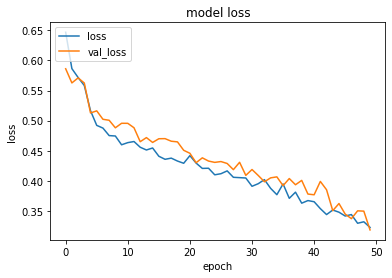

In [11]:
#전체용
filepath='./fbcsp_numpy_result/'
num_classes=2 #분류할 클래스 개수
X=[]
Y=[]
for file in os.listdir(filepath):
    if 'data' in file and 'sub8' in file:
        print(file)
        if len(X)==0:
            X=np.load(filepath+file)
        else:
            X1=np.load(filepath+file)
            X=np.concatenate((X,X1),axis=0)
    elif 'label' in file and 'sub8' in file:
        print(file)
        if len(Y)==0:
            Y=np.load(filepath+file)
        else:
            Y1=np.load(filepath+file)
            Y=np.concatenate((Y,Y1),axis=0)

X = np.array(X)
Y = np.array(Y)
print("aug전 ",X.shape,Y.shape)

X=np.concatenate((X,DA_Jitter(X)),axis=0)
#X=np.concatenate((X,DA_Scaling(X)),axis=0)
#X=np.concatenate((X,DA_MagWarp(X)),axis=0) #코드수정필요
#X=np.concatenate((X,DA_Rotation(X)),axis=0) #rotation import해와야함
#Y=np.concatenate((Y,Y),axis=0)
Y=np.concatenate((Y,Y),axis=0)

print("aug후 ",X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
print(X_train.shape, X_test.shape)

xshape=X.shape[1]
hist=1 #global 변수선언용

lstm(50)